In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
ROOTPATH = 'C:/Users/User/Documents/FAHAD MOHAMMAD HOSSAIN/Thesis Resources/Implementation/New folder'
DATAPATH= ROOTPATH+'/dataset'
TRAINPATH = ROOTPATH+'/dataset/Training'
TESTPATH =  ROOTPATH+'/dataset/Testing'
MODELPATH = ROOTPATH+'/model'

In [3]:
two=glob.glob(TRAINPATH+'/2/*.*')
five=glob.glob(TRAINPATH+'/5/*.*')
ten=glob.glob(TRAINPATH+'/10/*.*')
twenty=glob.glob(TRAINPATH+'/20/*.*')
fifty=glob.glob(TRAINPATH+'/50/*.*')
one_hundred=glob.glob(TRAINPATH+'/100/*.*')
two_hundred=glob.glob(TRAINPATH+'/200/*.*')
five_hundred=glob.glob(TRAINPATH+'/500/*.*')
one_thousand=glob.glob(TRAINPATH+'/1000/*.*')

In [4]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  214
five :  214
ten:  214
twenty:  174
fifty:  214
one_hundred:  209
two_hundred:  60
five_hundred:  137
one_thousand:  168


In [5]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [7]:
IMAGE_SIZE=224
BATCH_SIZE=16


#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        TRAINPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        TRAINPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')

Found 1281 images belonging to 9 classes.
Found 315 images belonging to 9 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 319 images belonging to 9 classes.


In [9]:
training_set.class_indices

{'10': 0,
 '100': 1,
 '1000': 2,
 '2': 3,
 '20': 4,
 '200': 5,
 '5': 6,
 '50': 7,
 '500': 8}

In [10]:
validation_set.class_indices


{'10': 0,
 '100': 1,
 '1000': 2,
 '2': 3,
 '20': 4,
 '200': 5,
 '5': 6,
 '50': 7,
 '500': 8}

In [11]:
test_set.class_indices

{'10': 0,
 '100': 1,
 '1000': 2,
 '2': 3,
 '20': 4,
 '200': 5,
 '5': 6,
 '50': 7,
 '500': 8}

In [12]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


In [13]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=256 , kernel_size=3 , activation='relu' , input_shape=[224,224,3],padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=128 , kernel_size=3 , activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 ,  activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 ))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 ,  activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=9 , activation='softmax'))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,793 (1.83 MB)

 Trainable params: 478,793 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODELPATH+'finalCNN2.best.keras', verbose=1 ,save_best_only=True)

In [17]:
history=cnn.fit(training_set,
                batch_size=BATCH_SIZE,
                epochs=100,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/100


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1175 - loss: 2.1918
Epoch 1: val_loss improved from inf to 2.16237, saving model to C:/Users/User/Documents/FAHAD MOHAMMAD HOSSAIN/Thesis Resources/Implementation/New folder/modelfinalCNN2.best.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1175 - loss: 2.1916 - val_accuracy: 0.1333 - val_loss: 2.1624
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1307 - loss: 2.1628
Epoch 2: val_loss improved from 2.16237 to 2.15372, saving model to C:/Users/User/Documents/FAHAD MOHAMMAD HOSSAIN/Thesis Resources/Implementation/New folder/modelfinalCNN2.best.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.1306 - loss: 2.1628 - val_accuracy: 0.1302 - val_loss: 2.1537
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1376 - loss: 2.1497
Epoch 3: val_loss improved from 2.15372 to 2.13132, saving model to C:/Users/User/Documents/FAHAD MOHAMMAD HOSSAIN/Thesis Resources/Implementation/New folder/modelf

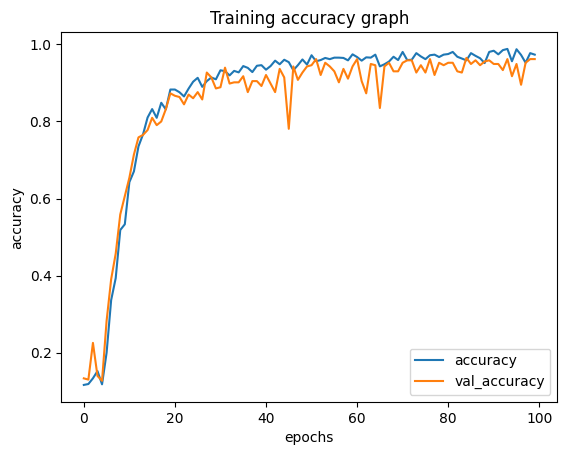

In [18]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

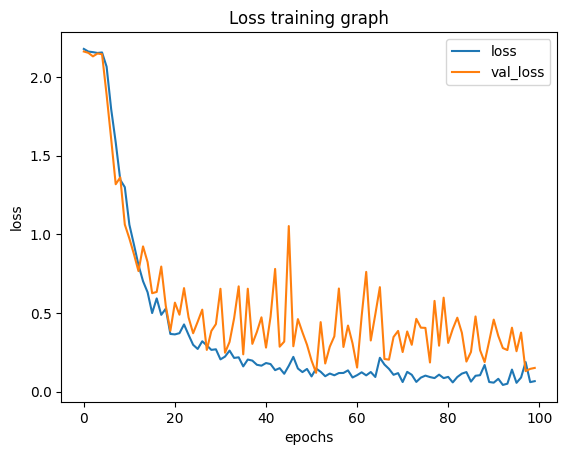

In [19]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [20]:
test_loss,test_accuracy=cnn.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 376ms/step - accuracy: 0.9500 - loss: 0.1898
Test Loss:  0.13925369083881378
Test Accuracy:  0.9655172228813171


In [21]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  96.55172228813171


In [22]:
predicted_result=cnn.predict(test_set)
predicted_result[:5]

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step


array([[9.9998879e-01, 8.4239206e-11, 4.3470203e-11, 1.7906764e-09,
        7.0936490e-12, 1.2826154e-08, 6.6444094e-12, 4.4940066e-06,
        6.7305332e-06],
       [9.9552071e-01, 3.5101143e-04, 1.4127426e-06, 1.8684641e-08,
        1.9334841e-05, 1.0514917e-07, 7.8756580e-07, 8.0208201e-04,
        3.3044796e-03],
       [9.9617320e-01, 1.6873558e-07, 8.7424951e-07, 6.9629101e-07,
        3.7324567e-06, 1.4251845e-07, 7.2738607e-05, 7.4469230e-05,
        3.6740140e-03],
       [9.9999964e-01, 1.3032559e-11, 5.0998698e-15, 5.4366672e-12,
        5.8540737e-14, 2.6184225e-07, 4.4872280e-16, 9.0093302e-08,
        8.1673901e-10],
       [9.8158836e-01, 2.3682044e-06, 5.0935473e-06, 1.2536234e-03,
        2.5337445e-07, 7.1233958e-06, 4.1254597e-07, 1.7030943e-02,
        1.1188835e-04]], dtype=float32)

In [23]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [24]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [25]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[34  0  2  0  0  0  0  0  1]
 [ 0 37  0  0  0  0  0  0  1]
 [ 0  0 48  0  0  0  4  0  0]
 [ 0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0]
 [ 1  0  0  1  0  0 35  0  0]
 [ 0  0  0  0  0  0  0 37  0]
 [ 0  0  1  0  0  0  0  0 36]]


<Axes: >

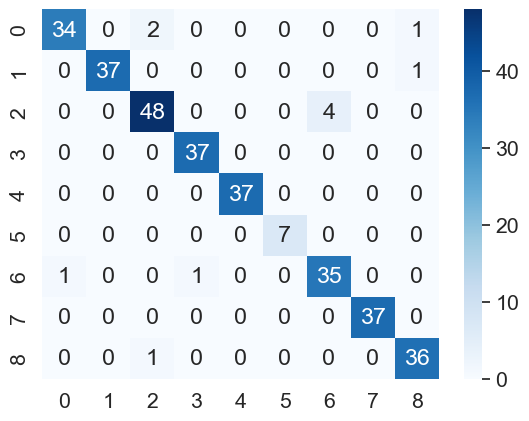

In [30]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.9655172413793104


In [32]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       1.00      0.97      0.99        38
           2       0.94      0.92      0.93        52
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00         7
           6       0.90      0.95      0.92        37
           7       1.00      1.00      1.00        37
           8       0.95      0.97      0.96        37

    accuracy                           0.97       319
   macro avg       0.97      0.97      0.97       319
weighted avg       0.97      0.97      0.97       319



In [4]:
 model = tf.keras.models.load_model(filepath=MODELPATH+'finalCNN2.best.keras')

In [9]:
import os
import pyttsx3 
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import time
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from playsound import playsound
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [14]:

model_path=("./modelfinalCNN2.best.keras")
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,436,381 (5.48 MB)

 Trainable params: 478,793 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 957,588 (3.65 MB)

In [20]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="ten taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="100"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="1000"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="2"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==4:
        ans="20"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="200"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="5"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="50"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="500"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
500


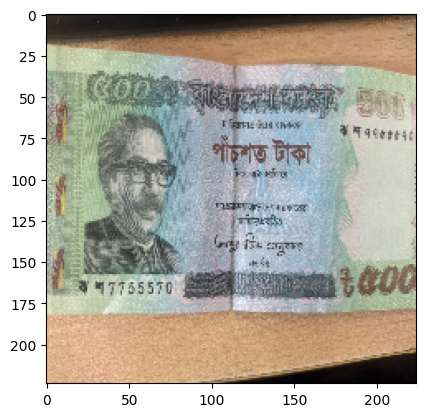

In [33]:
import matplotlib.pyplot as plt

random_image=image.load_img('D:/cnn/500_h.jpeg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
200


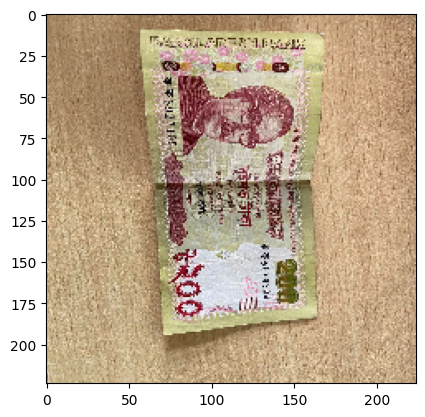

In [33]:
random_image=image.load_img('C:/Users/User/Documents/FAHAD MOHAMMAD HOSSAIN/Thesis Resources/200.jpeg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
10


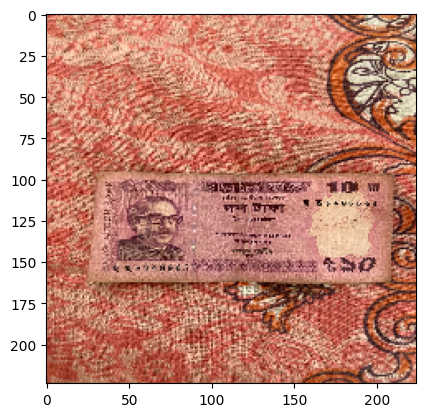

In [46]:
random_image=image.load_img('C:/Users/User/Documents/FAHAD MOHAMMAD HOSSAIN/Thesis Resources/102.jpeg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
10


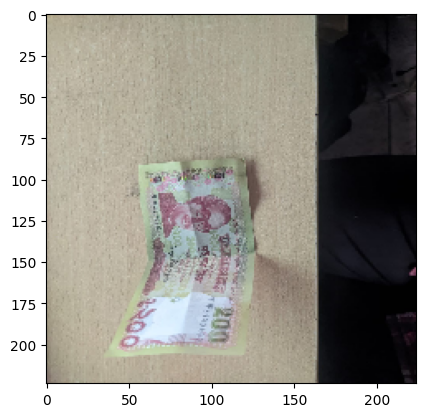

In [55]:
random_image=image.load_img('C:/Users/User/Documents/FAHAD MOHAMMAD HOSSAIN/Thesis Resources/200_t.jpeg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

In [39]:
model.save("../taka1.keras")

In [25]:
from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
import numpy as np
from io import BytesIO
from PIL import Image
import tensorflow as tf

app = FastAPI()

origins = [
    "http://localhost",
    "http://localhost:3000",
    "http://localhost:8000",
    'http://127.0.0.1:8000'
]
app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

MODEL = tf.keras.models.load_model("D:/cnn/modelfinalCNN2.best.keras")

CLASS_NAMES = ['10',
 '100',
 '1000',
 '2',
 '20',
 '200',
 '5',
 '50',
 '500']

@app.get("/ping")
async def ping():
    return "Hello, I am alive"

def read_file_as_image(data) -> np.ndarray:
    image = Image.open(BytesIO(data))
    # Resize the image to match the expected input shape of the model
    resized_image = image.resize((224, 224))
    image_array = np.array(resized_image)
    return image_array

@app.post("/predict")
async def predict(
    file: UploadFile = File(...)
):
    try:
        image = read_file_as_image(await file.read())
        img_batch = np.expand_dims(image, 0)
        
        predictions = MODEL.predict(img_batch)

        predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
        confidence = np.max(predictions[0])
        print(predicted_class)
        return {
            'class': predicted_class,
            'confidence': float(confidence)
        }
    except Exception as e:
        print(e)

if __name__ == "__main__":
    uvicorn.run(app, host='localhost', port=8001)


ModuleNotFoundError: No module named 'fastapi'

In [27]:
pip install FastAPI

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import os

model_version=max([int(i) fori in os.listdir("../models")+[0]])+1
reload_model.save(f"../models/{model_version}")

In [35]:
model_version=max([int(i) fori in os.listdir("../models")+[0]])+1
reload_model.save(f"../models/{model_version}")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2716731969.py, line 1)

In [30]:
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
reload_model.save(f"../models/{model_version}")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=../models/1.

In [36]:
import os

# Get the list of existing model directories
existing_models = [int(i) for i in os.listdir("../models") if os.path.isdir(os.path.join("../models", i))]

# Calculate the next version number
model_version = max(existing_models, default=0) + 1

# Save the model with the new version number
reload_model.save(f"../models/{model_version}")


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=../models/1.